<h1>Zadanie 10</h1>

<h2>CYFROWE PRZETWARZANIE SYGNAŁÓW I OBRAZÓW <br>
Przetwarzanie i analiza sygnału EKG</h2>
<h3>
Kasper Radom 264023 <br>
Maciej Szymczak 263978</h3>

In [1]:
%matplotlib ipympl
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from skimage import filters
from skimage.morphology import disk
from skimage.filters import rank, laplace, sobel, gaussian
from skimage.exposure import rescale_intensity
from IPython.display import display
from matplotlib.widgets import RectangleSelector

image_name = 'characters_test_pattern.tif'
image = ski.io.imread(image_name)

Lista rozmiarów masek do eksperymentów

In [2]:
mask_sizes = [3, 5, 9, 15]

Filtracja uśredniająca

In [3]:
def apply_averaging_filter(image, mask_size):
    return filters.rank.mean(image, np.ones((mask_size, mask_size)))


Filtracja gaussowska

In [4]:
def apply_gaussian_filter(image, sigma):
    return filters.gaussian(image, sigma)

Wyświetlanie wyników

In [8]:
def display_filtered_images(image, filter_func, mask_sizes, filter_name):
    fig, axes = plt.subplots(1, len(mask_sizes) + 1, figsize=(10, 10), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Oryginalny')

    for i, mask_size in enumerate(mask_sizes, 1):
        filtered_image = filter_func(image, mask_size)
        ax[i].imshow(filtered_image, cmap='gray')
        ax[i].set_title(f'{filter_name} maska {mask_size}')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

Wyświetl obrazy po filtracji uśredniającej

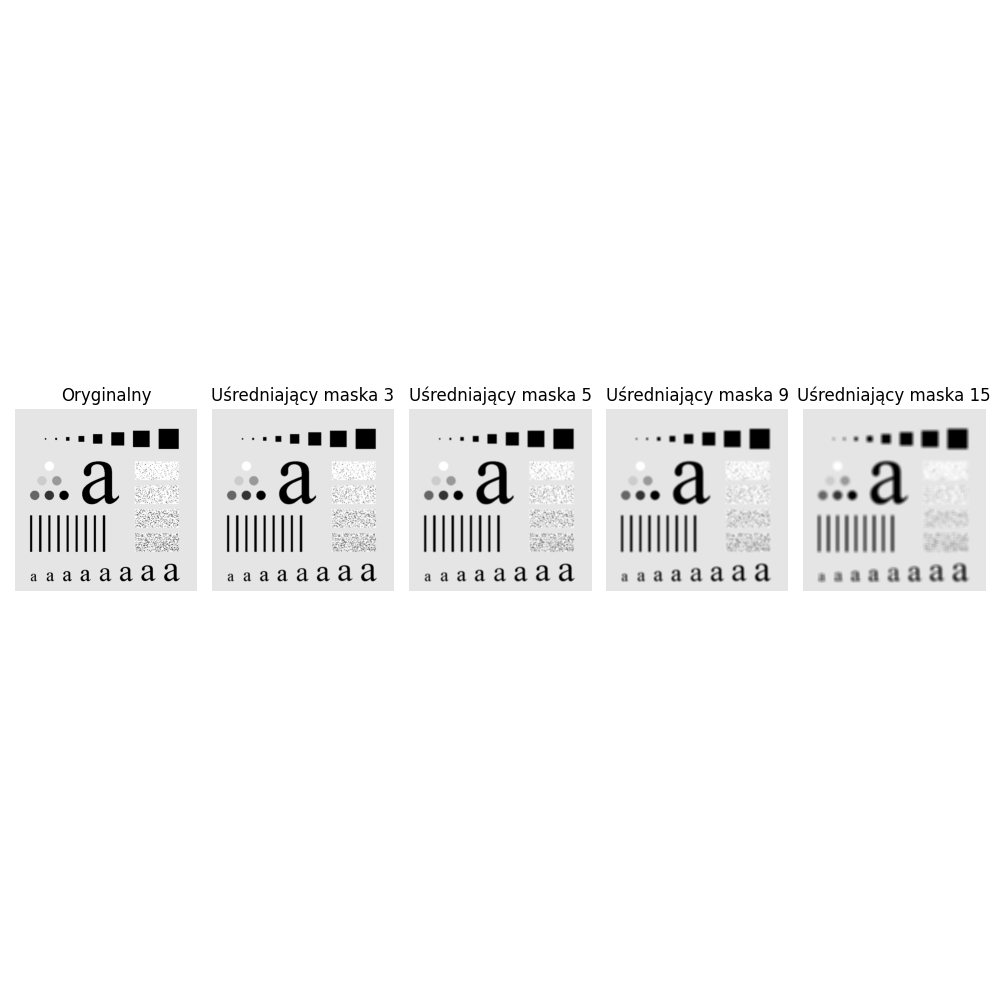

In [9]:
display_filtered_images(image, apply_averaging_filter, mask_sizes, 'Uśredniający')


Wyświetl obrazy po filtracji gaussowskiej
sigma zamiast rozmiarów masek, ponieważ filtr gaussowski jest parametryzowany przez sigma


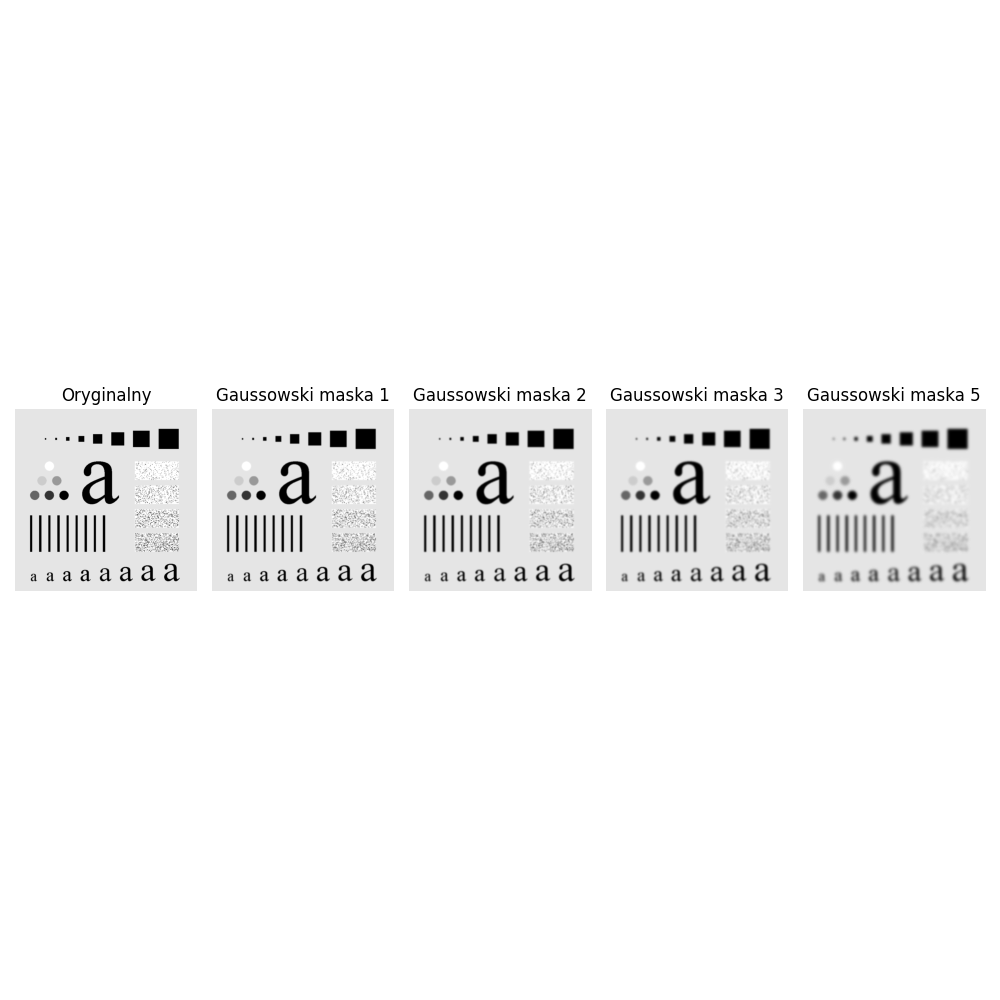

In [10]:
sigmas = [1, 2, 3, 5]
display_filtered_images(image, apply_gaussian_filter, sigmas, 'Gaussowski')
